# Lecture 20

## Root finding in one dimension

Recall that a *root* of a function $f(x)$ is a value $x_0$ such that $f(x_0)=0$.

Assuming $f:\mathbb R \to \mathbb R$ is continuous, you can tell that an interval $[a, b]$ contains at least one root by checking that the sign of $f(a)$ is distinct from the sign of $f(b)$ (e.g., if $f(a)>0$ and $f(b) < 0$). This is the implicit function theorem.

In this case, we can nest down to a root by bisecting the interval and checking the sign of the midpoint.

Sage has a built in function `sgn(x)` which returns $1$ if $x>0$, $0$ if $x=0$, and $-1$ if $x<0$.

### Example

Take the function $f(x)=x^2 - \cos x$. We can see that $f(0)=-1$ and $f(1)=1-\cos(1) < 0$.

In [1]:
def bisection_method(f, a, b, n):
    '''
    Apply the bisection method n-times to narrow down to a root in (a,b).

    We return the pair (a', b') representing the interval obtained by the 
    process. If it happens we stumble on a root by bisection, we return 
    (r, r) where r is the root.
    '''
    a_sgn = sgn(f(a))
    if a_sgn == 0:
        return (a,a)
    b_sgn = sgn(f(b))
    if b_sgn == 0:
        return (b,b)
    if a_sgn == b_sgn:
        raise ValueError('The signs at the end points have the same sign.')
    for i in range(n):
        c = (a+b)/2
        c_sgn = sgn(f(c))
        if c_sgn == a_sgn:
            a = c
        elif c_sgn == b_sgn:
            b = c
        else:
            # c_sgn = 0
            return (c, c)
    return (a, b)

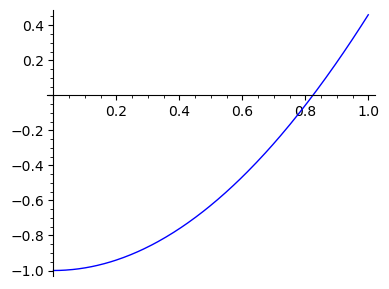

In [2]:
f(x) = x^2 - cos(x)
plt1 = plot(f, (0,1), figsize=4)
plt1

(13/16, 27/32) = (0.812500000000000, 0.843750000000000)


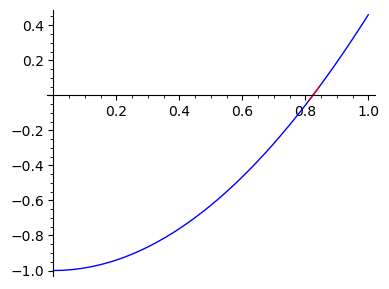

In [3]:
(a,b) = bisection_method(f, 0, 1, 5)
print(f'({a}, {b}) = ({a.n()}, {b.n()})')
plt2 = plot(f, (a, b), figsize=4, color='red')
plt1 + plt2

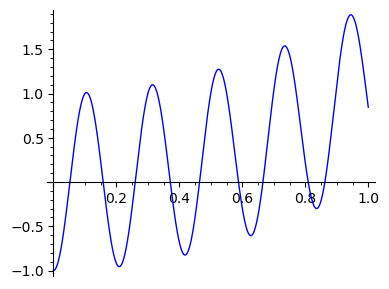

In [4]:
g(x) = x^2 - cos(30*x)
plt1 = plot(g, (0,1), figsize=4)
plt1

In [5]:
@interact
def show_bisection(n=input_box(default=1)):
    (a,b) = bisection_method(g, 0, 1, n)
    print(f'({a}, {b}) = ({a.n()}, {b.n()})')
    plt2 = plot(g, (a, b), figsize=4, color='red')
    return plt1 + plt2

Interactive function <function show_bisection at 0x7f47c8657ce0> with 1 widget
  n: EvalText(value='1', description='n', layout=Layout(max_width='81em'))

## False position

Rather than the center point, we guess that the zero should be near where the lines segment between $\big(a, f(a)\big)$ and $\big(b, f(b)\big)$ crosses the line $y=0$. It does so at the point where
$$x = a - f(a) \frac{b - a}{f(b)-f(a)} = \frac{a f(b) - b f(a)}{f(b)-f(a)}.$$

In [6]:
def false_position_method(f, a, b, n, plot=False):
    '''
    Apply the false position method n-times to narrow down to a root in (a,b).

    We return the pair (a', b') representing the interval obtained by the 
    process. If it happens we stumble on a root by bisection, we return 
    (r, r) where r is the root.
    '''
    # We used plot as a keyword argument
    from sage.plot.plot import plot as sage_plot

    a_sgn = sgn(f(a))
    if a_sgn == 0:
        return (a,a)
    b_sgn = sgn(f(b))
    if b_sgn == 0:
        return (b,b)
    if a_sgn == b_sgn:
        print(f'a={a} a_sgn={a_sgn} b={b} b_sgn={b_sgn}')
        raise ValueError(f'The signs at the end points have the same sign.')
    if plot:
        plt = sage_plot(f, (a, b), figsize=4) 
    for i in range(n):
        if plot:
            plt += line2d([(a, f(a)), (b,f(b))], color='green')
        c = (a*f(b)-b*f(a)) / (f(b)-f(a))
        c_sgn = sgn(f(c))
        if c_sgn == a_sgn:
            a = c
        elif c_sgn == b_sgn:
            b = c
        else:
            # c_sgn = 0
            if plot:
                show(plt)
            return (c, c)
    if plot:
        plt += sage_plot(f, (a, b), color='red')
        show(plt)
    return (a, b)

In [7]:
f(x) = tan(x) - 3

In [8]:
@interact
def false_pos_demo(n=input_box(default=1)):
    a,b = false_position_method(f, 0, 1.5, n, plot=True)
    print(f'({a}, {b}) = ({a.n()}, {b.n()})')

Interactive function <function false_pos_demo at 0x7f47c8448360> with 1 widget
  n: EvalText(value='1', description='n', layout=Layout(max_width='81em'))

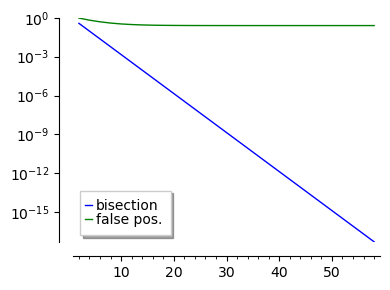

In [9]:
f(x) = tan(x) - 3
bisection = []
false_position = []
R = RealField(4*53)
for n in range(2, 60, 2):
    (a,b) = bisection_method(f, 0, R(1.5), n)
    bisection.append((n, b-a))
    (a,b) = false_position_method(f, 0, R(1.5), n)
    false_position.append((n, b-a))
line2d(bisection, legend_label='bisection', figsize=4, scale='semilogy') + \
    line2d(false_position, legend_label='false pos.', color='green')

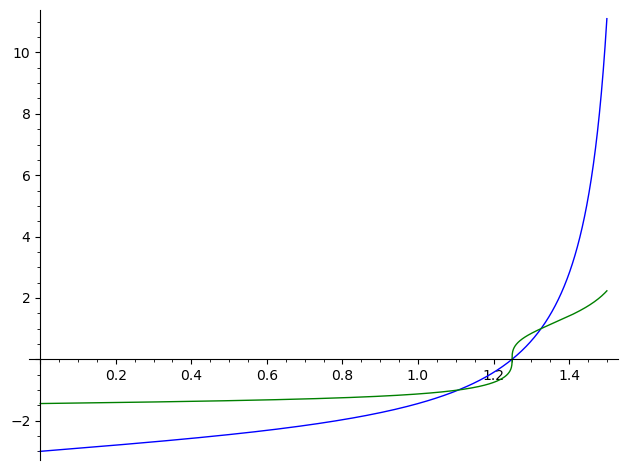

In [10]:
f(x) = tan(x) - 3
def g(x):
    return RDF(sgn(f(x)) * abs(f(x))^(1/3))
plot(f,(0,1.5)) + plot(g,(0,1.5), color='green')

In [11]:
@interact
def false_pos_demo(n=input_box(default=1)):
    a,b = false_position_method(g, 0, 1.5, n, plot=True)
    print(f'({a}, {b}) = ({a.n()}, {b.n()})')

Interactive function <function false_pos_demo at 0x7f47c84200e0> with 1 widget
  n: EvalText(value='1', description='n', layout=Layout(max_width='81em'))

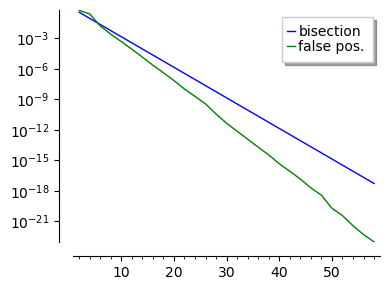

In [12]:
R = RealField(10*53)
f(x) = tan(x) - 3
def g(x):
    return R(sgn(f(x)) * abs(f(x))^(1/3))
bisection = []
false_position = []
for n in range(2, 60, 2):
    (a,b) = bisection_method(f, 0, R(1.5), n)
    bisection.append((n, b-a))
    (a,b) = false_position_method(g, 0, R(1.5), n)
    false_position.append((n, b-a))
line2d(bisection, legend_label='bisection', figsize=4, scale='semilogy') + \
    line2d(false_position, legend_label='false pos.', color='green')

### A random method

A *Mobius transformation* is a map of the form
$$z \mapsto \frac{az+b}{cz+d}.$$
Given any pair of three points $(x_0, x_1, x_2), (y_0, y_1, y_2) \in \mathbb R^3$, there is a unique Mobius transformation sending $x_i \mapsto y_i$ for each $i$. We compute this below:

In [13]:
var('a b c d')
mob(z) = (a*z+b)/(c*z+d)

In [14]:
var('a b c d')
x = var([f'x_{i}' for i in range(3)])
y = var([f'y_{i}' for i in range(3)])
x, y

((x_0, x_1, x_2), (y_0, y_1, y_2))

In [15]:
eqns = [mob(x[i]) == y[i] for i in range(3)]
eqns

[(a*x_0 + b)/(c*x_0 + d) == y_0,
 (a*x_1 + b)/(c*x_1 + d) == y_1,
 (a*x_2 + b)/(c*x_2 + d) == y_2]

In [16]:
sol = solve(eqns,[a,b,c], solution_dict=True)[0]
sol

{a: ((x_1*y_2 - x_2*y_2)*d*y_1 + (d*x_0*(y_1 - y_2) - (x_1*y_1 - x_2*y_2)*d)*y_0)/(x_0*(x_1 - x_2)*y_0 + x_1*x_2*y_1 - x_1*x_2*y_2 - (x_1*y_1 - x_2*y_2)*x_0),
 b: -((x_1*y_2 - x_2*y_2)*d*x_0*y_1 + ((x_2*y_1 - x_1*y_2)*d*x_0 - (x_1*x_2*y_1 - x_1*x_2*y_2)*d)*y_0)/(x_0*(x_1 - x_2)*y_0 + x_1*x_2*y_1 - x_1*x_2*y_2 - (x_1*y_1 - x_2*y_2)*x_0),
 c: -(d*(x_1 - x_2)*y_0 - d*x_0*(y_1 - y_2) + (x_2*y_1 - x_1*y_2)*d)/(x_0*(x_1 - x_2)*y_0 + x_1*x_2*y_1 - x_1*x_2*y_2 - (x_1*y_1 - x_2*y_2)*x_0)}

In [17]:
mob = mob.subs(sol).full_simplify().factor()

In [18]:
a = mob.numerator().coefficient(z)
a

x_0*y_0*y_1 - x_1*y_0*y_1 - x_0*y_0*y_2 + x_2*y_0*y_2 + x_1*y_1*y_2 - x_2*y_1*y_2

In [19]:
b = mob.numerator() - mob.numerator().coefficient(z)*z
b.factor()

-x_0*x_2*y_0*y_1 + x_1*x_2*y_0*y_1 + x_0*x_1*y_0*y_2 - x_1*x_2*y_0*y_2 - x_0*x_1*y_1*y_2 + x_0*x_2*y_1*y_2

In [20]:
c = mob.denominator().coefficient(z)
c

-x_1*y_0 + x_2*y_0 + x_0*y_1 - x_2*y_1 - x_0*y_2 + x_1*y_2

In [21]:
d = mob.denominator() - mob.denominator().coefficient(z)*z
d.factor()

x_0*x_1*y_0 - x_0*x_2*y_0 - x_0*x_1*y_1 + x_1*x_2*y_1 + x_0*x_2*y_2 - x_1*x_2*y_2

In [22]:
def mobius(x,y):
    x_0, x_1, x_2 = x
    y_0, y_1, y_2 = y
    a = x_0*y_0*y_1 - x_1*y_0*y_1 - x_0*y_0*y_2 + x_2*y_0*y_2 + x_1*y_1*y_2 - x_2*y_1*y_2
    b = -x_0*x_2*y_0*y_1 + x_1*x_2*y_0*y_1 + x_0*x_1*y_0*y_2 - x_1*x_2*y_0*y_2 - x_0*x_1*y_1*y_2 + x_0*x_2*y_1*y_2
    c = -x_1*y_0 + x_2*y_0 + x_0*y_1 - x_2*y_1 - x_0*y_2 + x_1*y_2
    d = x_0*x_1*y_0 - x_0*x_2*y_0 - x_0*x_1*y_1 + x_1*x_2*y_1 + x_0*x_2*y_2 - x_1*x_2*y_2
    def mob(z):
        return (a*z+b)/(c*z+d)
    return mob

In [23]:
mob = mobius((0,1/2,1),(0,1/3,1))

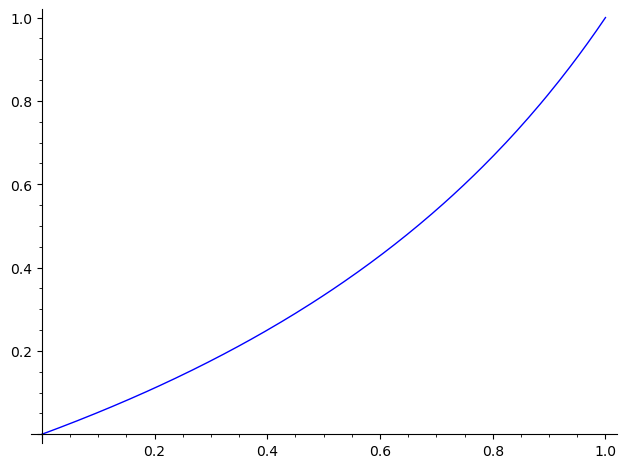

In [24]:
plot(mob, (0,1))

In [25]:
def random_false_position_method(f, a, b, n, plot=False):
    '''
    Apply the false position method n-times to narrow down to a root in (a,b).

    We return the pair (a', b') representing the interval obtained by the 
    process. If it happens we stumble on a root by bisection, we return 
    (r, r) where r is the root.
    '''
    # We used plot as a keyword argument
    from sage.plot.plot import plot as sage_plot

    a_sgn = sgn(f(a))
    if a_sgn == 0:
        return (a,a)
    b_sgn = sgn(f(b))
    if b_sgn == 0:
        return (b,b)
    if a_sgn == b_sgn:
        print(f'a={a} a_sgn={a_sgn} b={b} b_sgn={b_sgn}')
        raise ValueError(f'The signs at the end points have the same sign.')
    if plot:
        plt = sage_plot(f, (a, b), figsize=4) 
    for i in range(n):
        if plot:
            plt += line2d([(a, f(a)), (b,f(b))], color='green')
        c = (a*f(b)-b*f(a)) / (f(b)-f(a))
        mob = mobius((-1,0,1),(a,c,b))
        c = mob(R.random_element()^6)
        c_sgn = sgn(f(c))
        if c_sgn == a_sgn:
            a = c
        elif c_sgn == b_sgn:
            b = c
        else:
            # c_sgn = 0
            if plot:
                show(plt)
            return (c, c)
    if plot:
        plt += sage_plot(f, (a, b), color='red')
        show(plt)
    return (a, b)

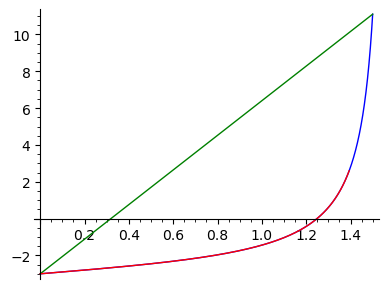

(0, 1.39393435656245)

In [26]:
f(x) = tan(x) - 3
random_false_position_method(f, 0, 1.5, 1, plot=True)

In [27]:
@interact
def _(n=input_box(default=1)):
    a,b = random_false_position_method(g, 0, 1.5, n, plot=True)
    print(f'({a}, {b}) = ({a.n()}, {b.n()})')

Interactive function <function _ at 0x7f47c8656a20> with 1 widget
  n: EvalText(value='1', description='n', layout=Layout(max_width='81em'))

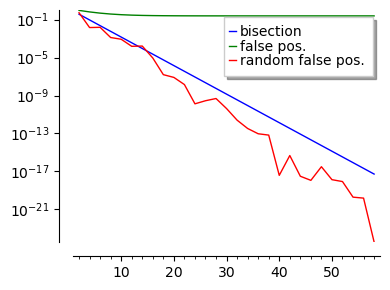

In [28]:
R = RealField(10*53)
f(x) = tan(x) - 3
def g(x):
    return R(sgn(f(x)) * abs(f(x))^(1/3))
bisection = []
false_position = []
random_fp = []
for n in range(2, 60, 2):
    (a,b) = bisection_method(f, 0, R(1.5), n)
    bisection.append((n, b-a))
    (a,b) = false_position_method(f, 0, R(1.5), n)
    false_position.append((n, b-a))
    (a,b) = random_false_position_method(g, 0, R(1.5), n)
    random_fp.append((n, b-a))
line2d(bisection, legend_label='bisection', figsize=4, scale='semilogy') + \
    line2d(false_position, legend_label='false pos.', color='green') + \
    line2d(random_fp, legend_label='random false pos.', color='red')

## Newton's method

Given a function $f(x)$ with derivative $f'(x)$, the linear approximation at $x_0$ is the function
$$L(x) = f(x_0) + f'(x_0) (x - x_0).$$
In *Newton's method* we start with a root $x_0$, then we approximate by the linear approximation and find the root of this linear map, taking that to be our next guess $x_1$ for the root. We have
$$x_1 = x_0 -\frac{f(x_0)}{f'(x_0)}.$$

In [29]:
def newtons_method(f, x_0, n, df=None, plot=False):
    var('x')
    if df is None:
        df(x) = f(x).derivative()
    if plot:
        lines = []
        points = [(x_0, f(x_0))]
        old_x_0 = x_0
    for i in range(n):
        x_0 = x_0 - f(x_0)/df(x_0)
        if plot:
            lines.append([(x_0, 0), (old_x_0, f(old_x_0))])
            points.append((x_0, f(x_0)))
            old_x_0 = x_0
    if plot:
        from sage.plot.plot import plot as sage_plot
        plt = point2d(points, color='red', size=20, figsize=4)
        plt += sage_plot(f, color='blue', **plt.get_minmax_data())
        for line in lines:
            plt += line2d(line, thickness=1/2, color='black')
        show(plt)
    return x_0

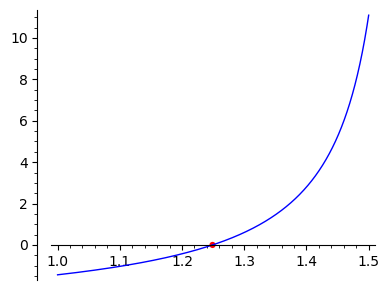

In [30]:
f(x) = tan(x) - 3
x0 = newtons_method(f, 1.5, 10)
plot(f,(1, 3/2)) + point2d([(x0,f(x0))], size=20, color='red', figsize=4)

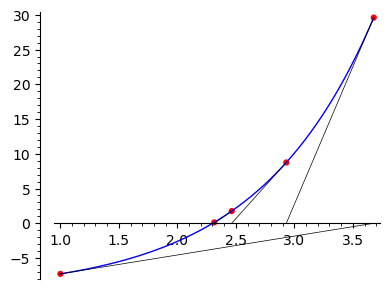

0.125196521981108

In [31]:
f(x) = e^x - 10
x0 = newtons_method(f, 1.0, 4, plot=True)
f(x0)

Demonstration of a problem with Newton's method: You need the derivative to be bounded at the fixed point.

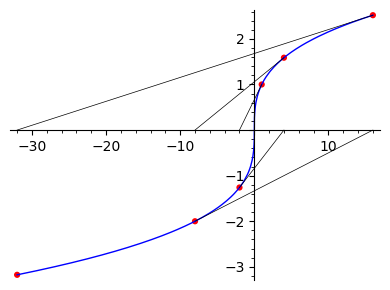

-32

In [32]:
# Cube root function:
f(x) = sgn(x) * abs(x)^(1/3)
newtons_method(f, 1, 5, plot=True)

Below is an example that seems to have slower convergence than the bisection method.

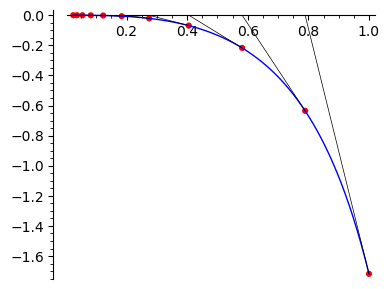

0.024298042791611997

In [33]:
f(x) = 1 - e^(x^3)
df(x) = f.derivative(x)
newtons_method(lambda x:RDF(f(x)), 1, 10, df = lambda x:RDF(df(x)), plot=True)

In [34]:
bisection_method(f,-0.75, 1, 10)

(-0.00146484375000000, 0.000244140625000000)

## Sturm's Theorem and polynomial roots

Sturm's theorem gives a formula for the number of roots of a polynomial $p(x)$ in the interval $(a,b]$. Let $d$ be the degree of $p$. We define a finite sequence of polnomials starting with
$$q_0(x) = p(x) \quad \text{and} \quad q_1(x)=p'(x).$$
Then for $i \geq 1$, we inductively define $q_{i+1}$ to be the negation of the remainder of polynomial division of $q_{i-1}$ by $q_i$.

This defines polynomials $q_0, \ldots, q_d$.

In SageMath, the remainder of this division can be computed with `%`:

In [36]:
PR.<x> = PolynomialRing(QQ)

In [37]:
p = PR(x^3 - 2*x^2 + 3*x - 4)
q_0 = p
print(f'q_0 = {q_0}')
q_1 = p.derivative()
print(f'q_1 = {q_1}')
q_2 = - (q_0 % q_1)
print(f'q_2 = {q_2}')

q_0 = x^3 - 2*x^2 + 3*x - 4
q_1 = 3*x^2 - 4*x + 3
q_2 = -10/9*x + 10/3


It is the (negative) remainder in the sense that if `quotient = q_0 // q_1` then we have ``q_0 == quotient*q_1 - q_2``.

In [38]:
quotient = q_0 // q_1
q_0 == quotient*q_1 - q_2

True

**Sturm's Theorem:**
Let $p$ be a non-zero polynomial and $[a,b]$ be an interval on which $p(a) \neq 0$ and $p(b) \neq 0$. If the polynomials $q_0, \ldots, q_d$ are defined as above, then the number of sign changes of the sequence $\big(q_0(a), \ldots, q_d(a)\big)$ minus the number of sign changes of $\big(q_0(b), \ldots, q_d(b)\big)$ is the number of roots (not counting multiplicity) of $p$ in the interval $(a,b]$.

The sign of a number $x$ is $-1$ if $x<0$, $0$ if $x=0$, and $1$ if $x>0$. 
Technically, a sign alternation in a sequence of signs $\{s_0, \ldots, s_d\}$ consists of a $k < \ell$ such that $s_k s_\ell = -1$ and
$$s_j=0 \quad \text{when $k < j < \ell$.}$$

For a proof of this version, see 

* Pébay, Philippe, J. Maurice Rojas, and David C. Thompson. "Sturm's Theorem with Endpoints." arXiv preprint [arXiv:2208.07904](https://arxiv.org/abs/2208.07904) (2022).

*Remark:* Given $p(x)$ to get a polynomial with simple roots, then
$$q(x) = \frac{p(x)}{\mathrm{gcd(p, p')}}$$
has the same roots but only a single copy of each one. (If $p$ has multiple roots at $x_0$, then there is a term in the factorization of the form $(x-x_0)^k$ with $k \geq 2$, and so the factorization of $p'$ has a term of the form $(x-x_0)^{k-1}$ and so the gcd also has a term of the form $(x-x_0)^{k-1}$ which will be removed when taking the quotient above.

In [39]:
p = PR(prod([(x-k)^k for k in range(1,6)]))
print(f'p = {p}')
q = p / gcd(p, p.derivative())
q.factor()

p = x^15 - 55*x^14 + 1400*x^13 - 21868*x^12 + 234290*x^11 - 1822678*x^10 + 10629552*x^9 - 47283632*x^8 + 161614309*x^7 - 424015067*x^6 + 845928448*x^5 - 1258456700*x^4 + 1348952000*x^3 - 981360000*x^2 + 432000000*x - 86400000


(x - 5) * (x - 4) * (x - 3) * (x - 2) * (x - 1)

In [40]:
def sturm(p, a, b):
    d = p.degree()
    q = [p, p.derivative()]
    while len(q) <= d:
        q.append( -(q[-2]%q[-1]) )
    a_changes = 0
    a_sign = sgn(q[0](a))
    for i in range(1, d+1):
        new_sign = sgn(q[i](a))
        if a_sign*new_sign == -1:
            a_changes += 1
        if new_sign != 0:
            a_sign = new_sign
    b_changes = 0
    b_sign = sgn(q[0](b))
    for i in range(1, d+1):
        new_sign = sgn(q[i](b))
        if b_sign*new_sign == -1:
            b_changes += 1
        if new_sign != 0:
            b_sign = new_sign
    return a_changes - b_changes    

In [43]:
R.<x> = PolynomialRing(QQ, 'x')

In [44]:
p = (x - 34)^2 * (x - 5) * (x - 3) * (x - 2) * (x - 2/3)

In [45]:
sturm(p, 1/2, 34)

5

## Finding all roots

An *isolating interval* for a root of a polynomial is an interval that contains this root and no other roots. Here is an outline of how you could find all the real roots of a polynomial.

1. Find a bounded interval containing all the real roots.
2. Repeatedly bisect the intervals containing roots, using Sturm's theorem to determine which contain roots.

There are many other approaches.

**Cauchy's root bound.** If $r \in \mathbb C$ is a root of a polynomial
$$p(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_0,$$
then 
$$|r| < 1 + \max \left\{|\frac{a_{n-1}}{a_n}|, |\frac{a_{n-2}}{a_{n}}|, \ldots, |\frac{a_1}{a_n}|, |\frac{a_0}{a_n}|\right\}.$$ 

In [46]:
PR = QQ[x]

In [47]:
p = PR(x^3-3*x^2-4*x+1)
p

x^3 - 3*x^2 - 4*x + 1

In [48]:
p.degree()

3

In [49]:
p.coefficients()

[1, -4, -3, 1]

In [50]:
def cauchy_root_bound(p):
    coefs = p.coefficients()
    n = p.degree()
    return 1 + max(
        [abs(coefs[i]/coefs[n]) for i in range(n)]
    )

In [51]:
R = cauchy_root_bound(p)
R

5

In [52]:
sturm(p, -R, R)

3

In [53]:
def isolating_intervals(p, plot=False):
    # Return a list of pairs (a,b) representing intervals (a,b]
    # each containing exactly one root of the polynomial p.
    R = cauchy_root_bound(p)
    # Because Sturm's theorem checks for roots in (-R, R],
    # we need to rule out -R being a root.
    if p(-R)==0:
        i = (-R-1, R)
    else:
        i = (-R, R)
    total_roots = sturm(p, *i)
    if total_roots == 1:
        # There is only one root, we've already isolated it.
        isolating_intervals = [i,]
    else: 
        isolating_intervals = []
    intervals = [i,]
    while len(isolating_intervals) < total_roots:
        old_intervals = intervals
        intervals = []
        for i in old_intervals:
            a,b = i
            for j in [(a, (a+b)/2), ((a+b)/2, b)]:
                num_roots = sturm(p, *j)
                if num_roots == 1:
                    isolating_intervals.append(j)
                elif num_roots > 1:
                    intervals.append(j)
    if plot:
        from sage.plot.plot import plot as sage_plot
        var('x')
        plt = sage_plot(p(x), (x, -R, R), figsize=4)
        endpoints = set()
        for a,b in isolating_intervals:
            endpoints.add(a)
            endpoints.add(b)
        points = [(x, p(x)) for x in endpoints]
        plt += point2d(points, color='red', size=20)
        show(plt)
    return isolating_intervals

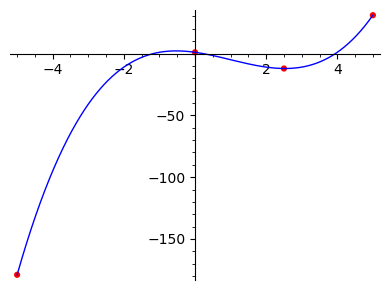

[(-5, 0), (0, 5/2), (5/2, 5)]

In [54]:
isolating_intervals(p, plot=True)